## Market Share

This notebook is to try plotting market share analysis.

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
import scipy.stats as stats

In [132]:
%%capture
%run create_distribution.ipynb

First, random sales data is generated for two imaginary companies. For this I'll use a function from my `create_distribution.ipynb` notebook.

In [145]:
comp_1 = create_distrib(m=2, b=50, sd=40, low=100, high=500, by=10, show=False, even=True)
print(comp_1.head(5))

comp_2 = create_distrib(m=1, b=50, sd=40, low=100, high=500, by=10, show=False, even=True)
print(comp_2.head(5))

     x           y
0  100  212.036096
1  110  290.117269
2  120  325.385933
3  130  281.108857
4  140  308.431488
     x           y
0  100  115.032339
1  110  122.027320
2  120  197.224555
3  130  120.309619
4  140  207.789261


The two dataframes can be combined.

In [146]:
df = pd.merge(comp_1, comp_2, on='x')
df.columns = ['x','Company 1', 'Company 2']
print(df.head(5))

     x   Company 1   Company 2
0  100  212.036096  115.032339
1  110  290.117269  122.027320
2  120  325.385933  197.224555
3  130  281.108857  120.309619
4  140  308.431488  207.789261


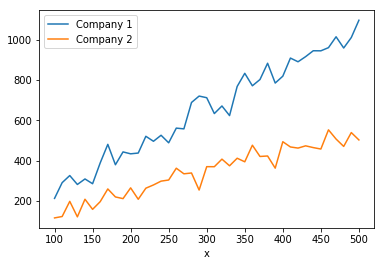

In [147]:
df.plot('x', ['Company 1','Company 2'])
plt.show()

Next, this is a plot of market share. Market share percentages add up to 100% so if only two companies are used, the lines will be symetrical around a midpoint.

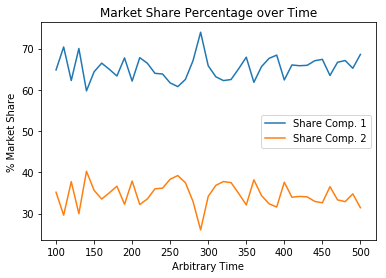

In [148]:
start1 = df['Company 1'][0]/(df['Company 1'][0]+df['Company 2'][0])
start2 = df['Company 2'][0]/(df['Company 1'][0]+df['Company 2'][0])
df = df.assign(s1=pd.Series(df['Company 1']/(df['Company 1']+df['Company 2'])*100))
df = df.assign(s2=pd.Series(df['Company 2']/(df['Company 1']+df['Company 2'])*100))
df.columns = ['x','Company 1','Company 2','Share Comp. 1','Share Comp. 2']
df.plot('x', ['Share Comp. 1','Share Comp. 2'])
plt.xlabel("Arbitrary Time")
plt.ylabel("% Market Share")
plt.title("Market Share Percentage over Time")
plt.show()